# Bolly Band


In [1]:
import fxcmpy
import pandas as pd
import numpy as np
import datetime as dt

from pyti.bollinger_bands import upper_bollinger_band as ubb
from pyti.bollinger_bands import middle_bollinger_band as mbb
from pyti.bollinger_bands import lower_bollinger_band as lbb
from pyti.bollinger_bands import percent_bandwidth as percent
from pyti.bollinger_bands import percent_b as pdb
from pyti.bollinger_bands import percent_b as pdb
from pyti.bollinger_bands import percent_b as pdb
from pyti.stochastic import percent_k
from pyti.stochastic import percent_d
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
socket = fxcmpy.fxcmpy(config_file = 'config.cfg')

In [3]:
data = socket.get_candles(instrument = 'USD/JPY', period = 'D1', start = dt.datetime(2015,1,1), end = dt.datetime(2018, 6, 10))

In [5]:
data['upper_band'] = ubb(data['askclose'], period = 20 )
data['mid_band'] = mbb(data['askclose'], period = 20 )
data['lower_band'] = lbb(data['askclose'], period = 20 )
data['bandwidth'] = percent(data['askclose'], period = 20)
data['bandwidth2'] = pdb(data['askclose'], period = 20)
data['bandwidth2'] = pdb(data['askclose'], period = 20)

In [ ]:
data


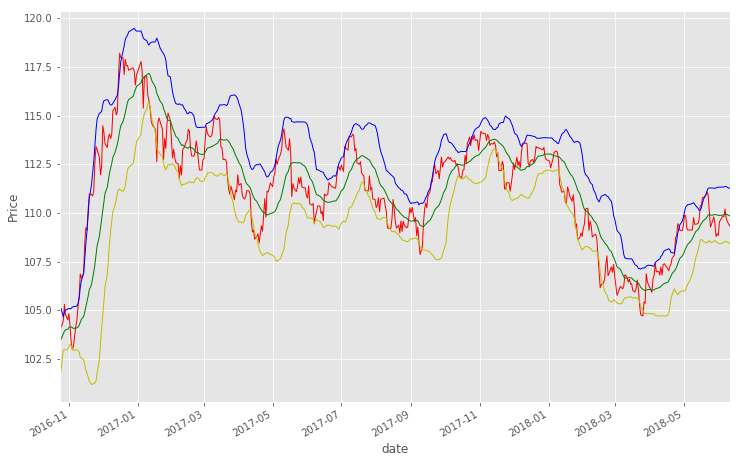

In [6]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111,  ylabel='Price')

days = 500



# Plotting our returns
data['askclose'].tail(days).plot(ax=ax1, color='r', lw=1)
data['upper_band'].tail(days).plot(ax=ax1, color = 'b', lw= 1)
data['mid_band'].tail(days).plot(ax=ax1, color = 'g', lw= 1)
data['lower_band'].tail(days).plot(ax=ax1, color = 'y', lw= 1)

#Higher percentage means more volatility

# Define narrowness with Bandwidth


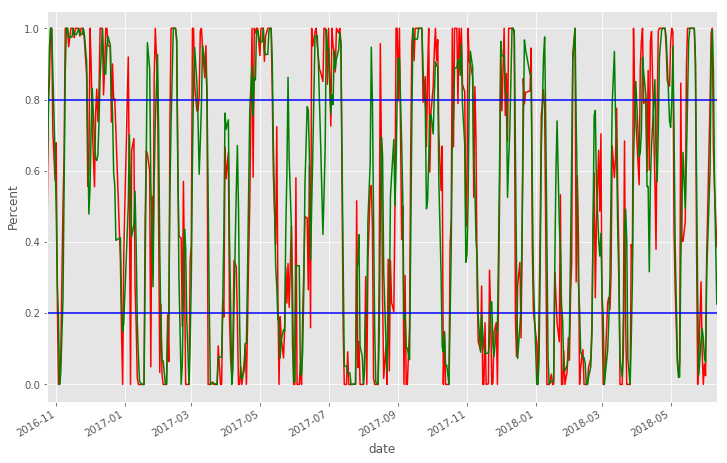

In [7]:
ss_plot = plt.figure(figsize=(12,8))
ax3 = ss_plot.add_subplot(111,  ylabel='Percent')
data['percent_k'].tail(days).plot(ax=ax3, color='r')
data['percent_d'].tail(days).plot(ax=ax3, color='g')
data['ovr'] = .80
data['ovr'].tail(days).plot(ax=ax3, color = 'b', )
data['blw'] = .20
data['blw'].tail(days).plot(ax=ax3, color = 'b',)


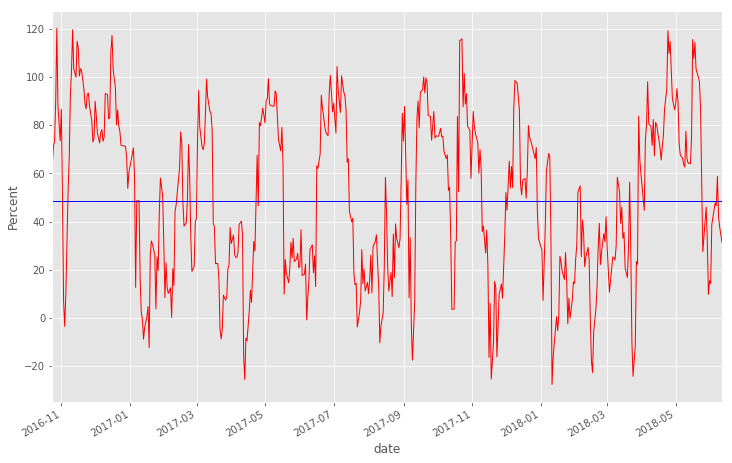

In [8]:
bandwidth_plot = plt.figure(figsize=(12,8))
ax2 = bandwidth_plot.add_subplot(111,  ylabel='Percent')
data['bandwidth2'].tail(days).plot(ax=ax2, color='r', lw=1)
data['percent_mean'] = data['bandwidth2'].mean()
data['percent_mean'].tail(days).plot(ax=ax2, color = 'b', lw= 1)

In [9]:
data['signal'] = np.where(data['bandwidth2']>20,1,0)

In [10]:
data['position'] = data['signal'].diff()

In [11]:
pip_cost = .09
lot_size = 10
begin_prices = []
end_prices = []
profits = 0

# Finding when a position is initiated and getting the open / close prices for the position
for i, row in data.iterrows():
    if row['position'] == 1:
        begin_prices.append(float(row['askopen']))
    if row['position'] == -1:
        end_prices.append(float(row['askopen']))

# Calculating the profit / loss using our pip cost and lot size
for i in range(len(begin_prices)):
    profit = (end_prices[i] - begin_prices[i]) * 100 * pip_cost * lot_size
    profits += profit
    print("The return for trade " + str(i + 1) + " is: " + str(int(profit)))
    
print (begin_prices)
print (end_prices)
print("The return for the period is: " + str(int(profits)))

The return for trade 1 is: -21
The return for trade 2 is: 263
The return for trade 3 is: 44
The return for trade 4 is: 21
The return for trade 5 is: 5
The return for trade 6 is: 411
The return for trade 7 is: 2
The return for trade 8 is: 35
The return for trade 9 is: 57
The return for trade 10 is: 277
The return for trade 11 is: 116
The return for trade 12 is: 63
The return for trade 13 is: 89
The return for trade 14 is: 11
The return for trade 15 is: 363
The return for trade 16 is: 136
The return for trade 17 is: -8
The return for trade 18 is: 9
The return for trade 19 is: 33
The return for trade 20 is: 106
The return for trade 21 is: 8
The return for trade 22 is: -14
The return for trade 23 is: 54
The return for trade 24 is: 54
The return for trade 25 is: -37
The return for trade 26 is: 201
The return for trade 27 is: 200
The return for trade 28 is: -14
The return for trade 29 is: 416
The return for trade 30 is: -54
The return for trade 31 is: 80
The return for trade 32 is: 152
The r

IndexError: list index out of range